<a href="https://colab.research.google.com/github/abduljabbar2017/project-Tensorflow/blob/main/text_vectorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Text Vectorization**

---


Vectorization is the process of converting a word to a vector of numbers that embodies the information contained in the word.

1.   Frequency Vectors
2.   One-Hot Encoding

1.   Term Frequency–Inverse Document Frequency
2.   Word2Vec

1.   Bidirectional Encoder Representations from Transformers (BERT). and variations of such models are available: RoBERTa, XLNet and others.













### **Token frequency as vector encoding**

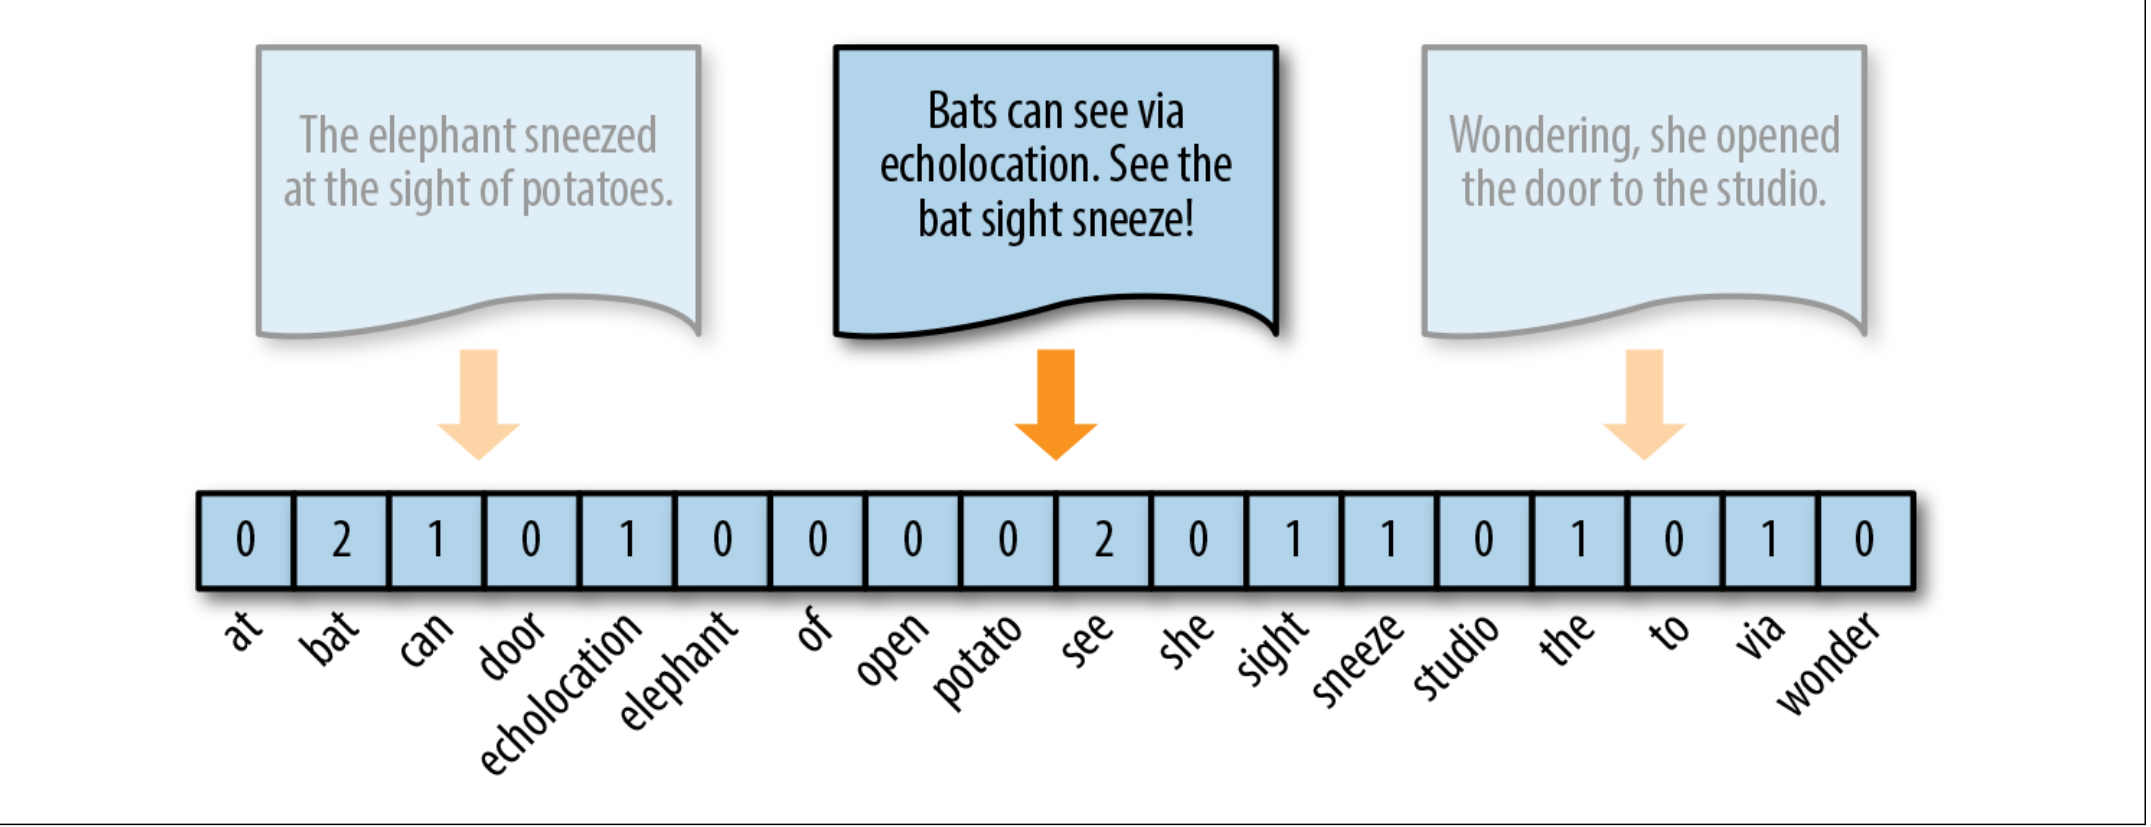

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
import string
def tokenize(text):
    stem = nltk.stem.SnowballStemmer('english')
    text = text.lower()
    for token in nltk.word_tokenize(text):
        if token in string.punctuation: continue
        yield stem.stem(token)

In [ ]:
corpus = [
"The elephant sneezed at the sight of potatoes.",
"Bats can see via echolocation. See the bat sight sneeze!",
"Wondering, she opened the door to the studio.",
]

In [ ]:
from collections import defaultdict

In [ ]:
def vectorize(doc):
    features = defaultdict(int)
    for token in tokenize(doc):
        features[token] += 1
    return features

In [ ]:
vectors = map(vectorize, corpus)

In [ ]:
for item in vectors:
    print(item)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(corpus)

In [ ]:
print(vectors)

In [ ]:
vectorizer.get_feature_names_out()

In [ ]:
vectors.toarray()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(vectors.toarray())

In [ ]:
query = vectorizer.transform(["elephant and studio"])
cosine_similarity(vectors, query)

More significant are given to tthat token which occur frequently. This raise the generalization

## **One-Hot Encoding**

one hot encoding if a word exist in the document then one

In [ ]:
from sklearn.preprocessing import Binarizer
freq = CountVectorizer()
corpus = freq.fit_transform(corpus)
onehot = Binarizer()
corpus = onehot.fit_transform(corpus.toarray())

In [ ]:
corpus

In [ ]:
import gensim
corpus = [tokenize(doc) for doc in corpus]
id2word = gensim.corpora.Dictionary(corpus)
vectors = [[(token[0], 1) for token in id2word.doc2bow(doc)]
for doc in corpus]